Implement the BSTIterator class that represents an iterator over the in-order traversal of a binary search tree (BST):

    BSTIterator(TreeNode root) Initializes an object of the BSTIterator class. The root of the BST is given as part of the constructor. The pointer should be initialized to a non-existent number smaller than any element in the BST.
    boolean hasNext() Returns true if there exists a number in the traversal to the right of the pointer, otherwise returns false.
    int next() Moves the pointer to the right, then returns the number at the pointer.

Notice that by initializing the pointer to a non-existent smallest number, the first call to next() will return the smallest element in the BST.

You may assume that next() calls will always be valid. That is, there will be at least a next number in the in-order traversal when next() is called.

Example 1:

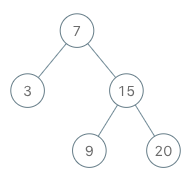

Input
["BSTIterator", "next", "next", "hasNext", "next", "hasNext", "next", "hasNext", "next", "hasNext"]
[[[7, 3, 15, null, null, 9, 20]], [], [], [], [], [], [], [], [], []]
Output
[null, 3, 7, true, 9, true, 15, true, 20, false]

Explanation
BSTIterator bSTIterator = new BSTIterator([7, 3, 15, null, null, 9, 20]);
bSTIterator.next();    // return 3
bSTIterator.next();    // return 7
bSTIterator.hasNext(); // return True
bSTIterator.next();    // return 9
bSTIterator.hasNext(); // return True
bSTIterator.next();    // return 15
bSTIterator.hasNext(); // return True
bSTIterator.next();    // return 20
bSTIterator.hasNext(); // return False

 

Constraints:

    The number of nodes in the tree is in the range [1, 105].
    0 <= Node.val <= 106
    At most 105 calls will be made to hasNext, and next.

 

Follow up:

    Could you implement next() and hasNext() to run in average O(1) time and use O(h) memory, where h is the height of the tree?



In [ ]:
from typing import Optional

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class BSTIterator:

    def __init__(self, root: Optional[TreeNode]):
        self.inorder = []
        
        def dfs(node):
            if node.left:
                dfs(node.left)
            self.inorder.append(node.val)
            if node.right:
                dfs(node.right)
        
        if root:
            dfs(root)
        self.len = len(self.inorder)
        self.idx = 0

    def next(self) -> int:
        val = self.inorder[self.idx]
        self.idx += 1
        return val

    def hasNext(self) -> bool:
        if self.idx < self.len:
            return True
        else:
            return False


# Your BSTIterator object will be instantiated and called as such:
# obj = BSTIterator(root)
# param_1 = obj.next()
# param_2 = obj.hasNext()


In [ ]:
class BSTIterator:
    def __init__(self, root: Optional[TreeNode]):
        self.iter = self._inorder(root)
        self.nxt = next(self.iter, None)
    
    def _inorder(self, node: Optional[TreeNode]) -> Generator[int, None, None]:
        if node:
            yield from self._inorder(node.left)
            yield node.val
            yield from self._inorder(node.right)

    def next(self) -> int:
        res, self.nxt = self.nxt, next(self.iter, None)
        return res

    def hasNext(self) -> bool:
        return self.nxt is not None
